## Heatwave

In [ ]:
import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.formula.api import ols

In [ ]:
df=pd.read_csv(f'city_heatwave.csv',parse_dates=['dt'],index_col=['dt'])
df.replace([np.inf, -np.inf], np.nan, inplace=True)
df=df[df['MAX']>=21]
df=df.dropna()

beijing=df[(df['city']=='beijing')]['2019-05-21':'2019-09-16']
xian=df[(df['city'] =='xian')]['2019-05-21':'2019-09-09']
changsha=df[(df['city'] =='changsha')]['2019-05-22':'2019-10-10']
shenzhen=df[(df['city'] =='shenzhen')]['2019-03-26':'2019-11-27']

'''
beijing=df[(df['city']=='beijing')]['2019-05-21':'2019-09-16']
xian=df[(df['city'] =='xian')]['2019-05-21':'2019-09-09']
changsha=df[(df['city'] =='changsha')]['2019-05-22':'2019-9-30']
shenzhen=df[(df['city'] =='shenzhen')]['2019-03-26':'2019-9-30']
'''
beijing['num_dessert']=beijing['num_dessert']/beijing['num_dessert'].max()
xian['num_dessert']=xian['num_dessert']/xian['num_dessert'].max()
changsha['num_dessert']=changsha['num_dessert']/changsha['num_dessert'].max()
shenzhen['num_dessert']=shenzhen['num_dessert']/shenzhen['num_dessert'].max()

beijing['sugar_weight']=beijing['sugar_weight']*100/18608.74448
xian['sugar_weight']=xian['sugar_weight']*100/11909.35212
changsha['sugar_weight']=changsha['sugar_weight']*100/17295.15878
shenzhen['sugar_weight']=shenzhen['sugar_weight']*100/15913.843839999998

df = pd.concat([beijing,xian,changsha,shenzhen])
#df = pd.concat([beijing,xian,changsha,shenzhen])
df['MAX']=df['MAX']-22

NUM_BINS=8
col=['RH','num_dessert','WDSP','PRCP']
dic={}
for i in col:
    dic[i+'_min']=df[i].min()
    dic[i+'_max']=df[i].max()
    interval=(df[i].max()-df[i].min())/(NUM_BINS-1)
    dic[i+'_bins']=np.arange(df[i].min(),df[i].max()+2*interval,interval).tolist()
df['RH_cut'] = pd.cut(df['RH'], bins=dic['RH_bins'], labels=range(0, NUM_BINS),right=False).astype(int)
df['num_dessert_cut'] = pd.cut(df['num_dessert'], bins=dic['num_dessert_bins'], labels=range(0,NUM_BINS),right=False).astype(int)
df['WDSP_cut'] = pd.cut(df['WDSP'], bins=dic['WDSP_bins'], labels=range(0, NUM_BINS),right=False).astype(int)
df['PRCP_cut'] = pd.cut(df['PRCP'], bins=dic['PRCP_bins'], labels=range(0, NUM_BINS),right=False).astype(int)
standard=['CMA_yellow','CMA_orange','CMA_red','WMO_90TH_1D','WMO_90TH_2D','WMO_90TH_3D','WMO_95TH_1D',
          'WMO_95TH_2D','WMO_95TH_3D','NOAA_10C_1D','NOAA_10C_2D','NOAA_10C_3D']
#df['city_heatwave']=df['city']+'_'+df[standard[3]]+'_'+df[standard[4]]
hlm0 = ols(f'sugar_weight ~ {standard[0]} + RH_cut + PRCP + WDSP_cut + num_dessert_cut + C(week_dt)', df)
hlmf0 = hlm0.fit()
print(hlmf0.summary())
hlm1 = ols(f'sugar_weight ~ {standard[1]} + RH_cut + PRCP + WDSP_cut + num_dessert_cut + C(week_dt)', df)
hlmf1 = hlm1.fit()
print(hlmf1.summary())
hlm2 = ols(f'sugar_weight ~ {standard[2]} + RH_cut + PRCP + WDSP_cut + num_dessert_cut + C(week_dt)', df)
hlmf2 = hlm2.fit()
print(hlmf2.summary())
hlm3 = ols(f'sugar_weight ~ {standard[3]} + RH_cut + PRCP + WDSP_cut + num_dessert_cut + C(week_dt)', df)
hlmf3 = hlm3.fit()
print(hlmf3.summary())
hlm4 = ols(f'sugar_weight ~ {standard[4]} + RH_cut + PRCP + WDSP_cut + num_dessert_cut + C(week_dt)', df)
hlmf4 = hlm4.fit()
print(hlmf4.summary())
hlm5 = ols(f'sugar_weight ~ {standard[5]} + RH_cut + PRCP + WDSP_cut + num_dessert_cut + C(week_dt)', df)
hlmf5 = hlm5.fit()
print(hlmf5.summary())
hlm6 = ols(f'sugar_weight ~ {standard[6]} + RH_cut + PRCP + WDSP_cut + num_dessert_cut + C(week_dt)', df)
hlmf6 = hlm6.fit()
print(hlmf6.summary())
hlm7 = ols(f'sugar_weight ~ {standard[7]} + RH_cut + PRCP + WDSP_cut + num_dessert_cut + C(week_dt)', df)
hlmf7 = hlm7.fit()
print(hlmf7.summary())
hlm8 = ols(f'sugar_weight ~ {standard[8]} + RH_cut + PRCP + WDSP_cut + num_dessert_cut + C(week_dt)', df)
hlmf8 = hlm8.fit()
print(hlmf8.summary())

beijing=df[(df['city']=='beijing')]['2019-05-21':'2019-09-16']
xian=df[(df['city'] =='xian')]['2019-05-21':'2019-09-09']
changsha=df[(df['city'] =='changsha')]['2019-05-22':'2019-9-30']
shenzhen=df[(df['city'] =='shenzhen')]['2019-03-26':'2019-9-30']

hlm9 = ols(f'sugar_weight ~ {standard[9]} + RH_cut + PRCP + WDSP_cut + num_dessert_cut + C(week_dt)', df)
hlmf9 = hlm9.fit()
print(hlmf9.summary())
hlm10 = ols(f'sugar_weight ~ {standard[10]} + RH_cut + PRCP + WDSP_cut + num_dessert_cut + C(week_dt)', df)
hlmf10 = hlm10.fit()
print(hlmf10.summary())
hlm11 = ols(f'sugar_weight ~ {standard[11]} + RH_cut + PRCP + WDSP_cut + num_dessert_cut + C(week_dt)', df)
hlmf11 = hlm11.fit()
print(hlmf11.summary())

                            OLS Regression Results                            
Dep. Variable:           sugar_weight   R-squared:                       0.201
Model:                            OLS   Adj. R-squared:                  0.186
Method:                 Least Squares   F-statistic:                     13.10
Date:                Tue, 14 Oct 2025   Prob (F-statistic):           2.16e-22
Time:                        14:14:58   Log-Likelihood:                -2696.6
No. Observations:                 585   AIC:                             5417.
Df Residuals:                     573   BIC:                             5470.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept            122.2006      4

Group: NOAA_10C_3D
  Coefficient: 12.4485
  95% CI: [4.2990, 20.5980]
  P-value: 2.8151e-03
--------------------------------------------------
Group: NOAA_10C_2D
  Coefficient: 14.9697
  95% CI: [7.5069, 22.4325]
  P-value: 9.1589e-05
--------------------------------------------------
Group: NOAA_10C_1D
  Coefficient: 13.1416
  95% CI: [6.5980, 19.6853]
  P-value: 8.9874e-05
--------------------------------------------------
Group: WMO_95TH_3D
  Coefficient: 12.5307
  95% CI: [3.8860, 21.1753]
  P-value: 4.5711e-03
--------------------------------------------------
Group: WMO_95TH_2D
  Coefficient: 16.5837
  95% CI: [9.4933, 23.6742]
  P-value: 5.3553e-06
--------------------------------------------------
Group: WMO_95TH_1D
  Coefficient: 16.4703
  95% CI: [10.0095, 22.9311]
  P-value: 7.3690e-07
--------------------------------------------------
Group: WMO_90TH_3D
  Coefficient: 13.7970
  95% CI: [8.3839, 19.2100]
  P-value: 7.3998e-07
-------------------------------------------------

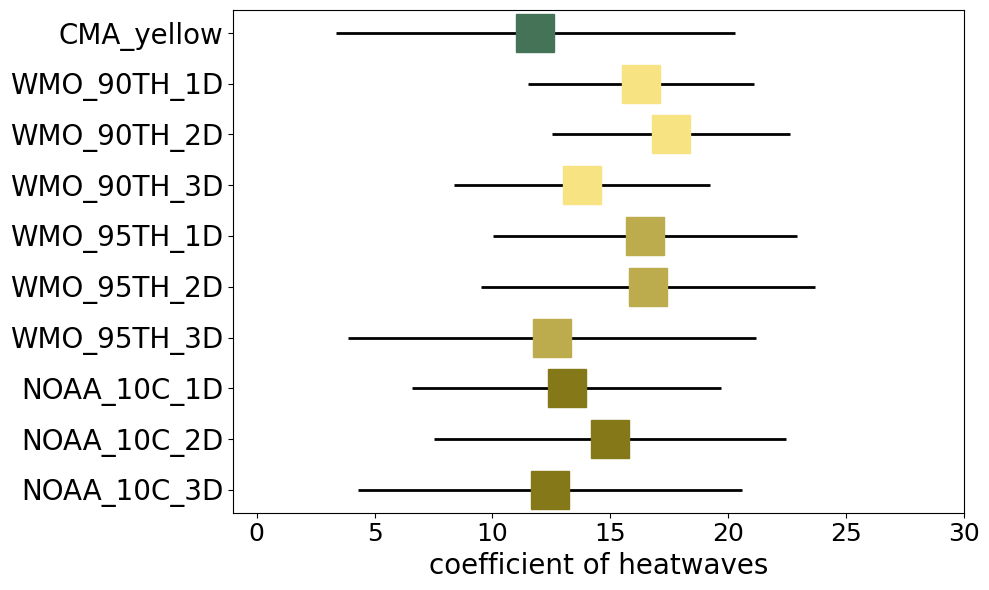

In [3]:
COLOR = sns.color_palette("Set2")
Tem_colors = {
    'CMA_yellow': '#447357',
    'WMO_90TH_1D': '#F7E382',
    'WMO_90TH_2D':'#F7E382',
    'WMO_90TH_3D':'#F7E382',
    'WMO_95TH_1D':'#BCAC4E',
    'WMO_95TH_2D':'#BCAC4E',
    'WMO_95TH_3D':'#BCAC4E',
    'NOAA_10C_1D':'#847819',
    'NOAA_10C_2D':'#847819',
    'NOAA_10C_3D':'#847819'
}
groups=['CMA_yellow','WMO_90TH_1D','WMO_90TH_2D','WMO_90TH_3D',
        'WMO_95TH_1D','WMO_95TH_2D','WMO_95TH_3D','NOAA_10C_1D','NOAA_10C_2D','NOAA_10C_3D']
groups=groups[::-1]
model=[hlmf0,hlmf3,hlmf4,hlmf5,hlmf6,hlmf7,hlmf8,hlmf9,hlmf10,hlmf11]
model=model[::-1]
plt.figure(figsize=(10, 6))
for i, j in zip(groups, model):
    dy_low, dy_high = j.conf_int().loc[i]
    dy = (dy_high - dy_low) / 2

    coef = j.params[i]
    p_value = j.pvalues[i]

    # 打印信息
    print(f"Group: {i}")
    print(f"  Coefficient: {coef:.4f}")
    print(f"  95% CI: [{dy_low:.4f}, {dy_high:.4f}]")
    print(f"  P-value: {p_value:.4e}")
    print('-' * 50)
    plt.errorbar(j.params[i] , i, xerr=dy, fmt='s', markersize=28,
                 ecolor='black', color=Tem_colors[i], elinewidth=2, capsize=2, capthick=0)
plt.yticks(fontsize=20)
plt.xticks(fontsize=18)
plt.xlim(-1,30)
plt.xlabel('coefficient of heatwaves',fontsize=20)
plt.tight_layout()
path='figure_heatwave_coef.pdf'
plt.savefig(path)
plt.show()